In [307]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sns
from scipy.stats import chi2_contingency

In [308]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [309]:
headerlist = ["status_account", "months", "credit_history", "purpose", "credit_amount", 
              "savings", "employment", "installment.rate", "personal_status", "guarantors", 
              "residence", "property", "age", "other_installments", "housing", "credit_cards", 
              "job","dependents", "phone", "foreign_worker", "rating"]
            
df = pd.read_csv('C:\\Users\\stoer\\Downloads\\statlog+german+credit+data\\german.data',  names=headerlist,  delim_whitespace=True)

In [310]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()
df['status_account'] = label_encoder.fit_transform(df['status_account']) + 1

In [311]:
label_encoder = LabelEncoder()
df['credit_history'] = label_encoder.fit_transform(df['credit_history']) + 1

In [312]:
df['purpose'].replace({'A40': 1}, inplace=True)
df['purpose'].replace({'A41': 2}, inplace=True)
df['purpose'].replace({'A42': 3}, inplace=True)
df['purpose'].replace({'A43': 4}, inplace=True)
df['purpose'].replace({'A44': 5}, inplace=True)
df['purpose'].replace({'A45': 6}, inplace=True)
df['purpose'].replace({'A46': 7}, inplace=True)
df['purpose'].replace({'A47': 8}, inplace=True)
df['purpose'].replace({'A48': 9}, inplace=True)
df['purpose'].replace({'A49': 10}, inplace=True)
df['purpose'].replace({'A410': 11}, inplace=True)

In [313]:
label_encoder = LabelEncoder()
df['savings'] = label_encoder.fit_transform(df['savings']) + 1

In [314]:
label_encoder = LabelEncoder()
df['employment'] = label_encoder.fit_transform(df['employment']) + 1

In [315]:
df['personal_status'].replace({'A91': 1}, inplace=True)
df['personal_status'].replace({'A92': 2}, inplace=True)
df['personal_status'].replace({'A93': 3}, inplace=True)
df['personal_status'].replace({'A94': 4}, inplace=True)
df['personal_status'].replace({'A95': 5}, inplace=True)

In [316]:
label_encoder = LabelEncoder()
df['guarantors'] = label_encoder.fit_transform(df['guarantors']) + 1

In [317]:
label_encoder = LabelEncoder()
df['property'] = label_encoder.fit_transform(df['property']) + 1

In [318]:
label_encoder = LabelEncoder()
df['other_installments'] = label_encoder.fit_transform(df['other_installments']) + 1

In [319]:
label_encoder = LabelEncoder()
df['housing'] = label_encoder.fit_transform(df['housing']) + 1

In [320]:
label_encoder = LabelEncoder()
df['job'] = label_encoder.fit_transform(df['job']) + 1

In [321]:
label_encoder = LabelEncoder()
df['dependents'] = label_encoder.fit_transform(df['dependents']) + 1

In [322]:
label_encoder = LabelEncoder()
df['phone'] = label_encoder.fit_transform(df['phone']) + 1

In [323]:
label_encoder = LabelEncoder()
df['foreign_worker'] = label_encoder.fit_transform(df['foreign_worker']) + 1

In [324]:
df['personal_status'].value_counts()

personal_status
3    548
2    310
4     92
1     50
Name: count, dtype: int64

In [325]:
# Choose the data for visulisation
df_plot = df[['personal_status', 'credit_amount', 'dependents', 'age', 'rating']]
# Create a Parallel Coordinates Plot'
fig = px.parallel_coordinates(
    df_plot,
    dimensions=['personal_status', 'credit_amount', 'dependents', 'age', 'rating'],
    color=df.index,
    labels={'personal_status', 'credit_amount', 'dependents', 'age', 'rating'})

# Customize the plot layout
fig.update_layout(
    title='Indications for credict rating',
    title_x=0.5,  
    margin=dict(t=100),  
)

fig.show()

In [326]:
Purpose = df['purpose']
fig = px.histogram(df, x="purpose", color="purpose")
fig.update_layout(
    title={
        'text':"Purpose breakdown",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
   
)
fig.show()

In [327]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [334]:
# List of categorical variables to analyze
categorical_variables = [
    "status_account",
    "credit_history",
    "purpose",
    "savings",
    "employment",
    "residence",
    "personal_status",
    "guarantors",
    "property",
    "housing",
    "job",
    "phone",
    "dependents",
    "foreign_worker"
]

# Create a DataFrame with just the categorical variables and "rating"
df_categorical = df[categorical_variables + ["rating"]]

# Perform Chi-squared test for each categorical variable
for cat_var in categorical_variables:
    contingency_table = pd.crosstab(df_categorical[cat_var], df_categorical["rating"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-squared test for {cat_var}:\n")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print("\n" + "=" * 50 + "\n")

Chi-squared test for status_account:

Chi-squared statistic: 123.72094351626559
P-value: 1.2189020722893842e-26


Chi-squared test for credit_history:

Chi-squared statistic: 61.69139696459551
P-value: 1.2791872956750918e-12


Chi-squared test for purpose:

Chi-squared statistic: 33.35644686141815
P-value: 0.00011574910079691586


Chi-squared test for savings:

Chi-squared statistic: 36.098928192418704
P-value: 2.761214238568249e-07


Chi-squared test for employment:

Chi-squared statistic: 18.3682738466968
P-value: 0.0010454523491402541


Chi-squared test for residence:

Chi-squared statistic: 0.7492964483880512
P-value: 0.8615521320413175


Chi-squared test for personal_status:

Chi-squared statistic: 9.60521395933605
P-value: 0.02223800546926877


Chi-squared test for guarantors:

Chi-squared statistic: 6.645366537264243
P-value: 0.036055954027247226


Chi-squared test for property:

Chi-squared statistic: 23.719551283864707
P-value: 2.8584415733250017e-05


Chi-squared test for hou

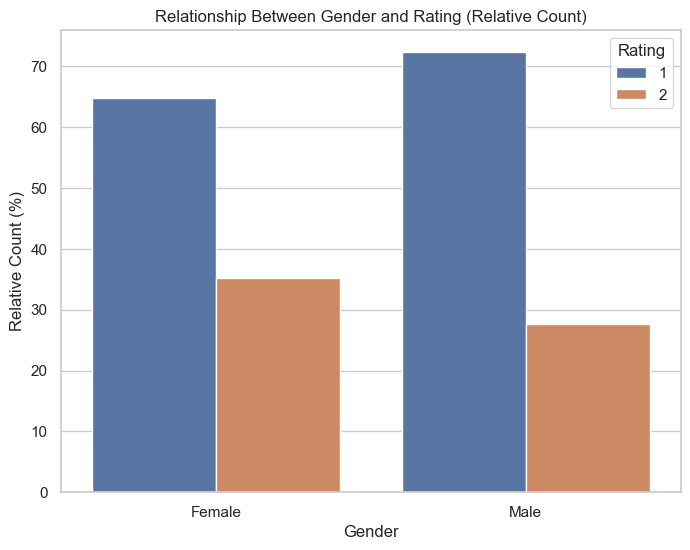

In [337]:

# Set the style for the plots
sns.set(style="whitegrid")

# Create a new column to map gender categories
df["Gender"] = df["personal_status"].map({
    1: "Male",
    2: "Female",
    3: "Male",
    4: "Male",
    5: "Female"
})

# Calculate relative counts (percentages) for each gender and rating category
gender_rating_relative_count = df.groupby(["Gender", "rating"]).size() / df.groupby("Gender").size() * 100
gender_rating_relative_count = gender_rating_relative_count.reset_index(name="Relative Count")

# Create a bar plot to show the relationship between Gender and Rating (Relative Count)
plt.figure(figsize=(8, 6))
sns.barplot(x="Gender", y="Relative Count", hue="rating", data=gender_rating_relative_count)
plt.title("Relationship Between Gender and Rating (Relative Count)")
plt.xlabel("Gender")
plt.ylabel("Relative Count (%)")
plt.legend(title="Rating")

# Show the plot
plt.show()

In [340]:
# Calculate SPD (Statistical Parity Difference) between male and female applicants
male_rating_counts = df[(df["Gender"] == "Male")].groupby("rating").size()
female_rating_counts = df[(df["Gender"] == "Female")].groupby("rating").size()

# Calculate acceptance rates for male and female applicants
male_acceptance_rate = male_rating_counts[1] / male_rating_counts.sum()
female_acceptance_rate = female_rating_counts[1] / female_rating_counts.sum()

# Calculate SPD
spd = abs(male_acceptance_rate - female_acceptance_rate)

print(f"Acceptance Rate for Male Applicants: {male_acceptance_rate:.2f}")
print(f"Acceptance Rate for Female Applicants: {female_acceptance_rate:.2f}")
print(f"Statistical Parity Difference (SPD): {spd:.2f}")

Acceptance Rate for Male Applicants: 0.72
Acceptance Rate for Female Applicants: 0.65
Statistical Parity Difference (SPD): 0.07


In [342]:
# Calculate DI (Disparate Impact) between male and female applicants
male_good_counts = df[(df["Gender"] == "Male") & (df["rating"] == 1)].shape[0]
female_good_counts = df[(df["Gender"] == "Female") & (df["rating"] == 1)].shape[0]

# Calculate DI
protected_group_proportion = female_good_counts / df[df["Gender"] == "Female"].shape[0]
reference_group_proportion = male_good_counts / df[df["Gender"] == "Male"].shape[0]

di = protected_group_proportion / reference_group_proportion

print(f"Proportion of Positive Predictions for Female Applicants: {protected_group_proportion:.2f}")
print(f"Proportion of Positive Predictions for Male Applicants: {reference_group_proportion:.2f}")
print(f"Disparate Impact Ratio (DI): {di:.2f}")

Proportion of Positive Predictions for Female Applicants: 0.65
Proportion of Positive Predictions for Male Applicants: 0.72
Disparate Impact Ratio (DI): 0.90


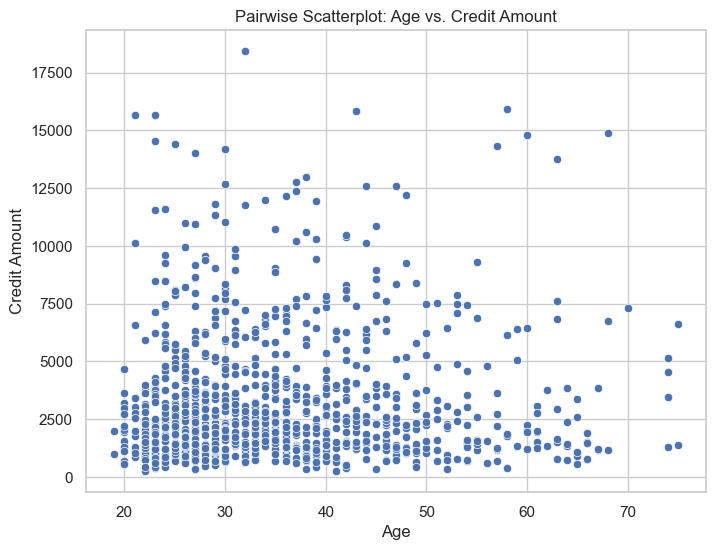

In [343]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatterplot for age vs. credit amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="credit_amount", data=df)
plt.title("Pairwise Scatterplot: Age vs. Credit Amount")
plt.xlabel("Age")
plt.ylabel("Credit Amount")

# Show the plot
plt.show()

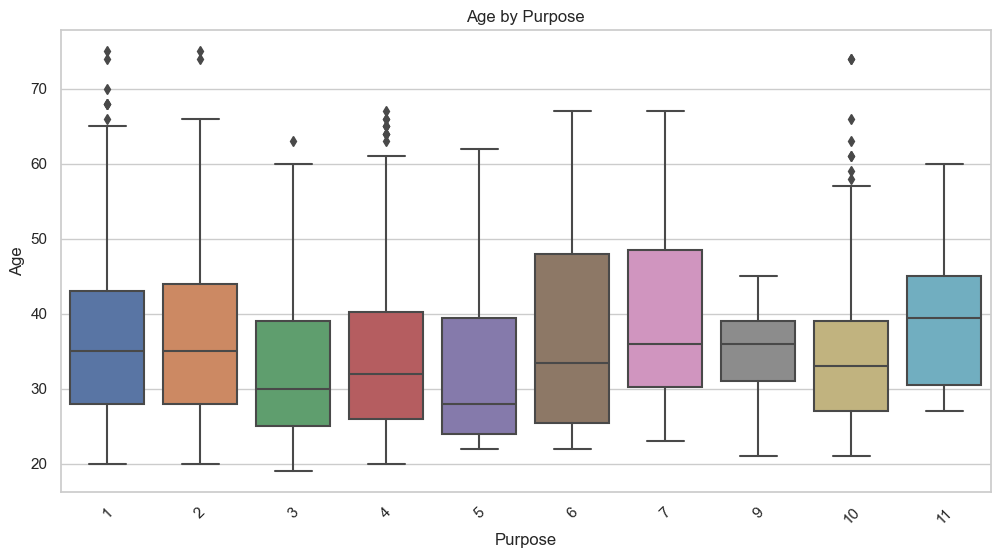

In [344]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot or violin plot for age by purpose
plt.figure(figsize=(12, 6))
sns.boxplot(x="purpose", y="age", data=df)
plt.title("Age by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Age")

# You can also use a violin plot for a different perspective
# sns.violinplot(x="purpose", y="age", data=df)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

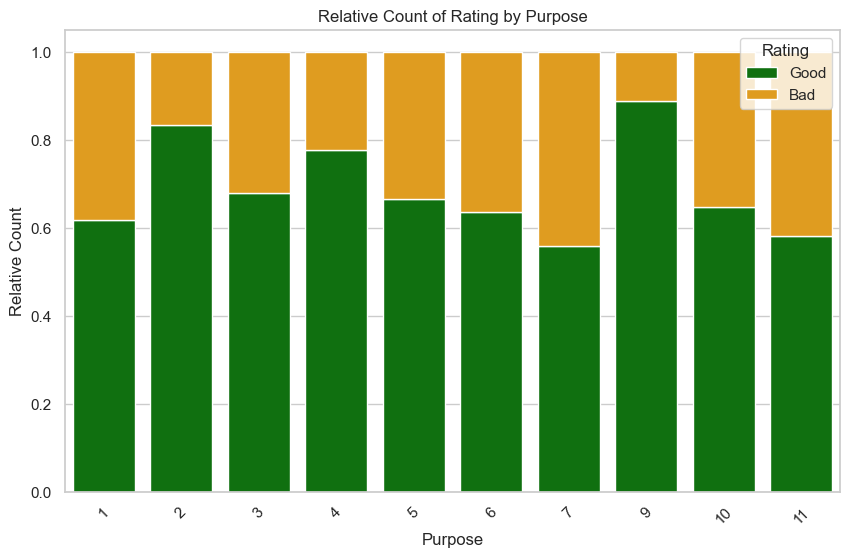

In [354]:
# Set the style for the plot
sns.set(style="whitegrid")

# Calculate the relative counts (proportions) of "rating" by a categorical variable (e.g., "purpose")
rating_by_purpose = df.groupby(['purpose', 'rating']).size().unstack().fillna(0)
rating_by_purpose = rating_by_purpose.div(rating_by_purpose.sum(axis=1), axis=0)

# Create a stacked bar plot for relative counts of "rating" by "purpose"
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_by_purpose.reset_index(), x="purpose", y=1, color="green", label="Good")
sns.barplot(data=rating_by_purpose.reset_index(), x="purpose", y=2, color="orange", bottom=rating_by_purpose[1], label="Bad")
plt.title("Relative Count of Rating by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Relative Count")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

#Show the plot with a legend
plt.legend(title="Rating", loc="upper right")
plt.show()